<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/CropRecommendationSystem/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"skfaizannasir","key":"0851e08dbcd1b0736b269ddf7edf01ff"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-14 06:30:31           7426  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4500  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1524  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2210  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 23.4MB/s]


In [ ]:
!unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


# Download and use the dataset from : https://www.kaggle.com/atharvaingle/crop-recommendation-dataset 

## Ignore the above cells.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N - ratio of Nitrogen content in soil<br>
P - ratio of Phosphorous content in soil<br>
K - ratio of Potassium content in soil<br>
temperature - temperature in degree Celsius<br>
humidity - relative humidity in %<br>
ph - ph value of the soil<br>
rainfall - rainfall in mm<br>

In [ ]:
label_list=df['label'].unique()

In [ ]:
label_list

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
len(label_list)

22

In [ ]:
d={}
for i in range(len(label_list)):
  key=label_list[i]
  d[key]=i

In [ ]:
d
#0-21 total-22 class labels

{'apple': 15,
 'banana': 10,
 'blackgram': 7,
 'chickpea': 2,
 'coconut': 18,
 'coffee': 21,
 'cotton': 19,
 'grapes': 12,
 'jute': 20,
 'kidneybeans': 3,
 'lentil': 8,
 'maize': 1,
 'mango': 11,
 'mothbeans': 5,
 'mungbean': 6,
 'muskmelon': 14,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 4,
 'pomegranate': 9,
 'rice': 0,
 'watermelon': 13}

In [ ]:
df['label']=df['label'].map(d)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [ ]:
for i in df.columns:
  if df[i].isnull().values.any()==True:
    print(i)
# no null values in any column

In [ ]:
df.isnull().values.any()
#no missing value in the dataset itself

False

In [ ]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486
label,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000


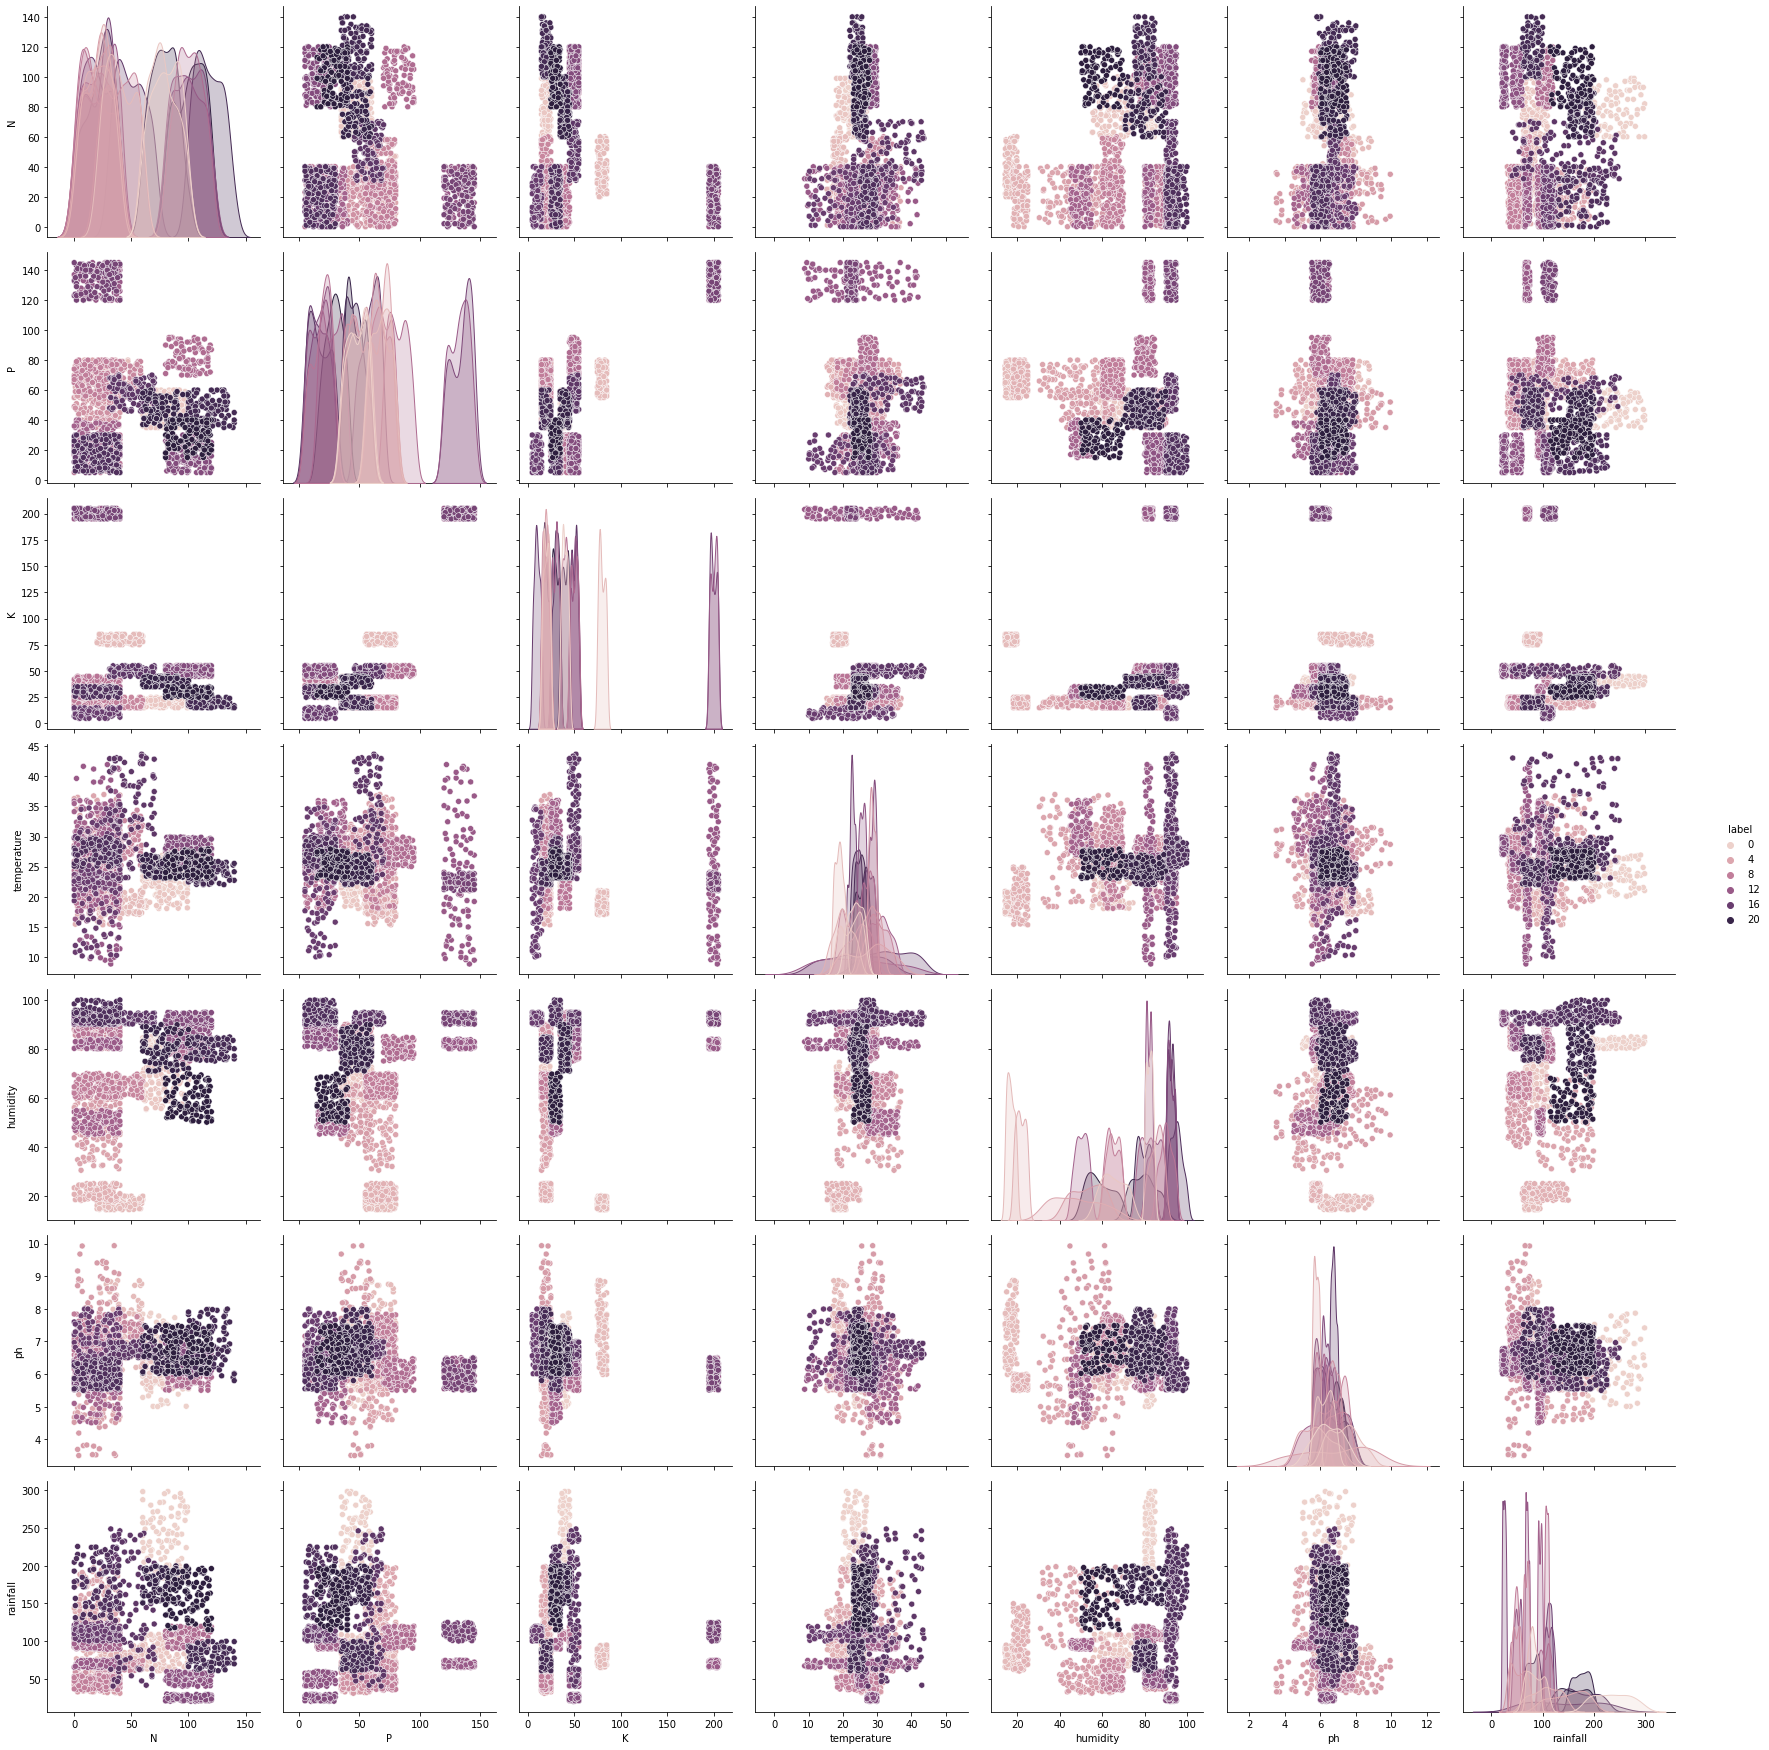

In [ ]:
g=sns.pairplot(df,hue='label')
g.fig.set_size_inches(25,25)

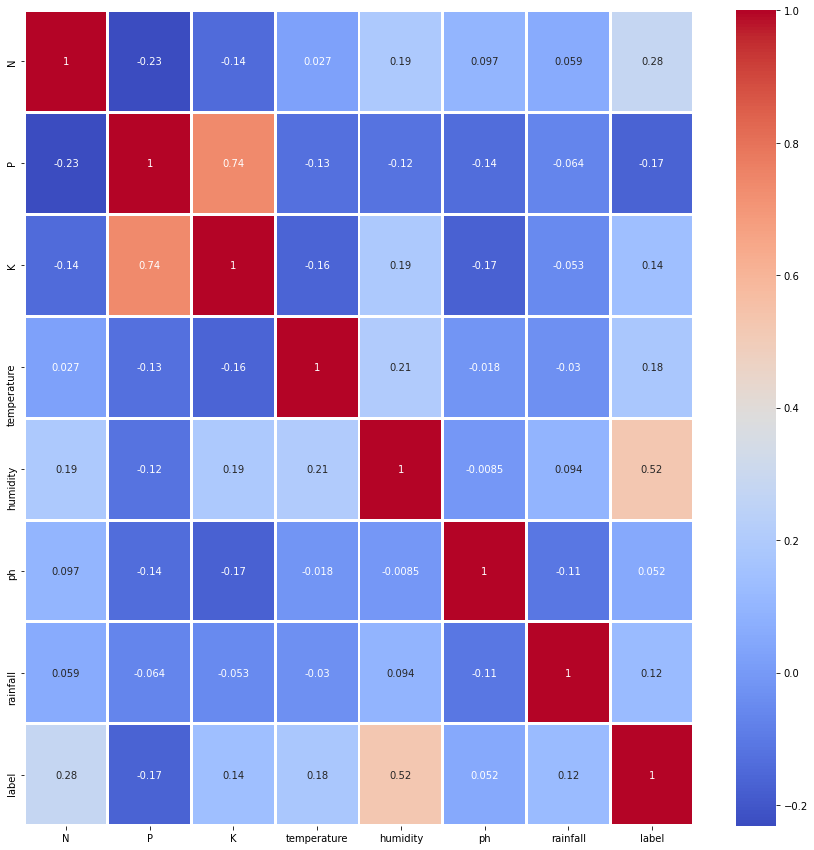

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [ ]:
#Function to find correlated values
def correlation(data,threshold):
  #using a set to avoid getting the same column name twice.
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        #Absolute value can also be taken to identify negatively correlated features using abs function
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
columnname=correlation(df,0.60)
#standard is 85 % but in some cases it may vary


In [ ]:
columnname

{'K'}

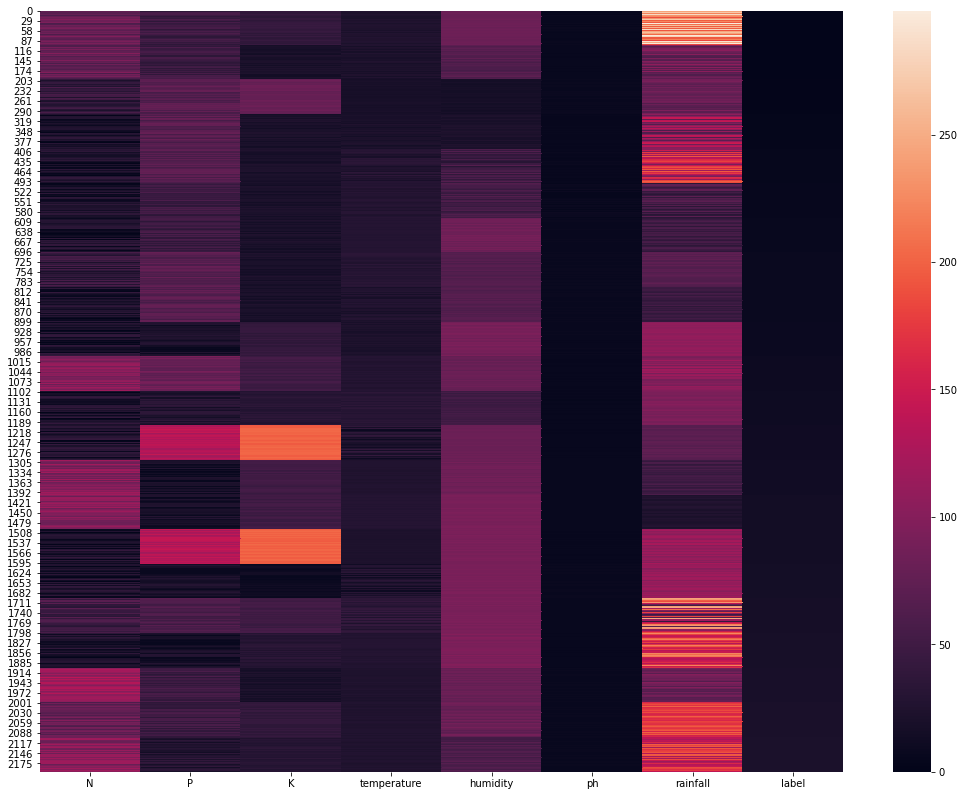

In [ ]:
plt.figure(figsize=(18,14))
h=sns.heatmap(df)

In [ ]:
Y=df['label']
X=df.drop('label',axis=1)

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split ,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [ ]:
len(x_train)

1760

In [ ]:
len(x_test)

In [ ]:
len(df)

2200

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)


In [ ]:
y_pred=clf_knn.predict(x_test)

In [ ]:
train_pred=clf_knn.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Training Accuracy:",accuracy_score(y_train,train_pred))

Training Accuracy: 0.9926136363636363


In [ ]:
print("Testing Accuracy:",accuracy_score(y_test,y_pred))

Testing Accuracy: 0.9727272727272728


In [ ]:
cross_val_score(clf_knn,X,Y,cv=5).mean()

0.975

In [ ]:

acc_list={}
for i in range(2,21):
  clf_knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  y_pred=clf_knn.predict(x_test)
  acc_list[accuracy_score(y_test,y_pred)]=i


In [ ]:
acc_list

{0.9681818181818181: 15,
 0.9704545454545455: 19,
 0.9727272727272728: 20,
 0.975: 10,
 0.9772727272727273: 7,
 0.9795454545454545: 8}

In [ ]:

max(acc_list)

0.9795454545454545

In [ ]:
acc_list[0.9795454545454545]

8

In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
cross_val_score(clf_knn,X,Y,cv=5).mean()

0.9772727272727273

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion='entropy').fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

In [ ]:
cross_val_score(clf,X,Y,cv=5)

array([0.99772727, 0.99090909, 0.99772727, 0.99318182, 0.99090909])

In [ ]:
cross_val_score(clf,X,Y,cv=5).mean()


0.9954545454545455

In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
2121,83,21,28,25.567483,60.492446,7.466901,190.225784
960,1,27,36,23.985988,93.342366,5.684995,104.991282
952,23,5,44,21.207254,94.263047,7.163005,107.566080
1958,116,52,19,22.942767,75.371706,6.114526,67.080226
681,6,37,17,28.086572,80.350059,6.760694,38.144768
...,...,...,...,...,...,...,...
1684,7,17,10,10.164313,91.223210,6.465913,106.362551
1477,86,18,45,28.965866,90.718329,6.566759,22.258381
851,6,64,23,23.335652,67.404607,7.065264,36.186787
370,37,56,25,22.055923,19.603793,5.774755,126.726537


In [ ]:
x_test=x_test.reset_index()

In [ ]:
x_test

In [ ]:
x_test.drop('index',axis=1,inplace=True)

In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
0,83,21,28,25.567483,60.492446,7.466901,190.225784
1,1,27,36,23.985988,93.342366,5.684995,104.991282
2,23,5,44,21.207254,94.263047,7.163005,107.566080
3,116,52,19,22.942767,75.371706,6.114526,67.080226
4,6,37,17,28.086572,80.350059,6.760694,38.144768
...,...,...,...,...,...,...,...
435,7,17,10,10.164313,91.223210,6.465913,106.362551
436,86,18,45,28.965866,90.718329,6.566759,22.258381
437,6,64,23,23.335652,67.404607,7.065264,36.186787
438,37,56,25,22.055923,19.603793,5.774755,126.726537


In [ ]:
x_train=x_train.reset_index()

In [ ]:
x_train

,index,N,P,K,temperature,humidity,ph,rainfall
0,1936,113,38,25,22.000851,79.472710,7.388266,90.422242
1,610,28,35,22,29.530376,86.733460,7.156563,59.872321
2,372,11,61,21,18.623288,23.024103,5.532101,135.337803
3,1559,29,139,205,23.641424,93.744615,6.155939,116.691218
4,1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...,...
1755,1071,105,88,54,25.787498,84.511942,6.020445,114.200546
1756,433,27,71,23,23.453790,46.487148,7.109598,150.871220
1757,674,23,39,22,29.256493,81.979522,6.864839,42.024833
1758,1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [ ]:
x_train.drop('index',axis=1,inplace=True)

In [ ]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
0,113,38,25,22.000851,79.472710,7.388266,90.422242
1,28,35,22,29.530376,86.733460,7.156563,59.872321
2,11,61,21,18.623288,23.024103,5.532101,135.337803
3,29,139,205,23.641424,93.744615,6.155939,116.691218
4,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1755,105,88,54,25.787498,84.511942,6.020445,114.200546
1756,27,71,23,23.453790,46.487148,7.109598,150.871220
1757,23,39,22,29.256493,81.979522,6.864839,42.024833
1758,117,81,53,29.507046,78.205856,5.507642,98.125658


In [ ]:
data=df.loc[0]
data

N               90.000000
P               42.000000
K               43.000000
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label            0.000000
Name: 0, dtype: float64

In [ ]:
test_df=pd.DataFrame(columns=df.columns)

In [ ]:
test_df

,N,P,K,temperature,humidity,ph,rainfall,label


In [ ]:
for i in range(len(data)):
  c=test_df.columns[i]
  test_df[c]=pd.Series(data[i])
  

In [ ]:
test_df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,0.0


In [ ]:
label=test_df['label']
test_df.drop('label',axis=1,inplace=True)

In [ ]:
test_df

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536


In [ ]:
d

{'apple': 15,
 'banana': 10,
 'blackgram': 7,
 'chickpea': 2,
 'coconut': 18,
 'coffee': 21,
 'cotton': 19,
 'grapes': 12,
 'jute': 20,
 'kidneybeans': 3,
 'lentil': 8,
 'maize': 1,
 'mango': 11,
 'mothbeans': 5,
 'mungbean': 6,
 'muskmelon': 14,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 4,
 'pomegranate': 9,
 'rice': 0,
 'watermelon': 13}

In [ ]:
pred=clf.predict(test_df)
pred

array([0])

In [ ]:
accuracy_score(label,pred)

1.0